#Importing Libraries

In [217]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold, cross_val_score
import pickle

#Dataset

In [218]:
data = pd.read_csv('survey_lung_cancer.csv', encoding='utf-8')

In [219]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304,F,71,2,2,2,2,1,2,1,1,1,2,2,2,2,YES
3305,F,75,1,1,1,1,2,2,1,1,1,1,2,1,1,NO
3306,F,62,2,2,2,2,2,2,1,1,1,1,2,2,1,YES
3307,M,30,2,2,2,2,2,1,2,2,2,1,1,2,2,YES


In [220]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [221]:
data.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
3304,F,71,2,2,2,2,1,2,1,1,1,2,2,2,2,YES
3305,F,75,1,1,1,1,2,2,1,1,1,1,2,1,1,NO
3306,F,62,2,2,2,2,2,2,1,1,1,1,2,2,1,YES
3307,M,30,2,2,2,2,2,1,2,2,2,1,1,2,2,YES
3308,M,40,1,1,1,2,2,1,2,1,2,2,2,1,1,YES


In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3309 non-null   object
 1   AGE                    3309 non-null   int64 
 2   SMOKING                3309 non-null   int64 
 3   YELLOW_FINGERS         3309 non-null   int64 
 4   ANXIETY                3309 non-null   int64 
 5   PEER_PRESSURE          3309 non-null   int64 
 6   CHRONIC DISEASE        3309 non-null   int64 
 7   FATIGUE                3309 non-null   int64 
 8   ALLERGY                3309 non-null   int64 
 9   WHEEZING               3309 non-null   int64 
 10  ALCOHOL CONSUMING      3309 non-null   int64 
 11  COUGHING               3309 non-null   int64 
 12  SHORTNESS OF BREATH    3309 non-null   int64 
 13  SWALLOWING DIFFICULTY  3309 non-null   int64 
 14  CHEST PAIN             3309 non-null   int64 
 15  LUNG_CANCER          

In [223]:
#Checking to see if there are any null values
data.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [224]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [225]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000
mean,55.869749,1.563614,1.569961,1.498338,1.501662,1.505289,1.671502,1.555153,1.555153,1.556966,1.578725,1.639770,1.469628,1.557268
std,14.407765,0.496012,0.495156,0.500073,0.500073,0.500048,0.469738,0.497024,0.497024,0.496819,0.493838,0.480139,0.499152,0.496785
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,44.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,56.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [226]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['GENDER', 'LUNG_CANCER'], dtype='object')


In [227]:
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Verify the transformation
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


#Data preprocessing

In [228]:
# Handling missing values - fill missing values instead of dropping rows
data.fillna(method='ffill', inplace=True)

<ipython-input-228-6addcd9ae0da>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [229]:
# Splitting data into fea-tures and target variable
X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']
print(X.shape)

(3309, 15)


In [230]:
data_clean = data.dropna()

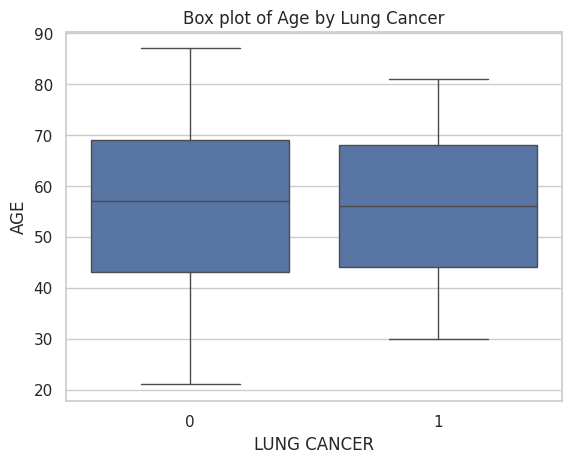

In [231]:
sns.boxplot(x="LUNG_CANCER", y="AGE", data=data_clean)
plt.title('Box plot of Age by Lung Cancer')
plt.xlabel('LUNG CANCER')
plt.ylabel('AGE')
plt.show()

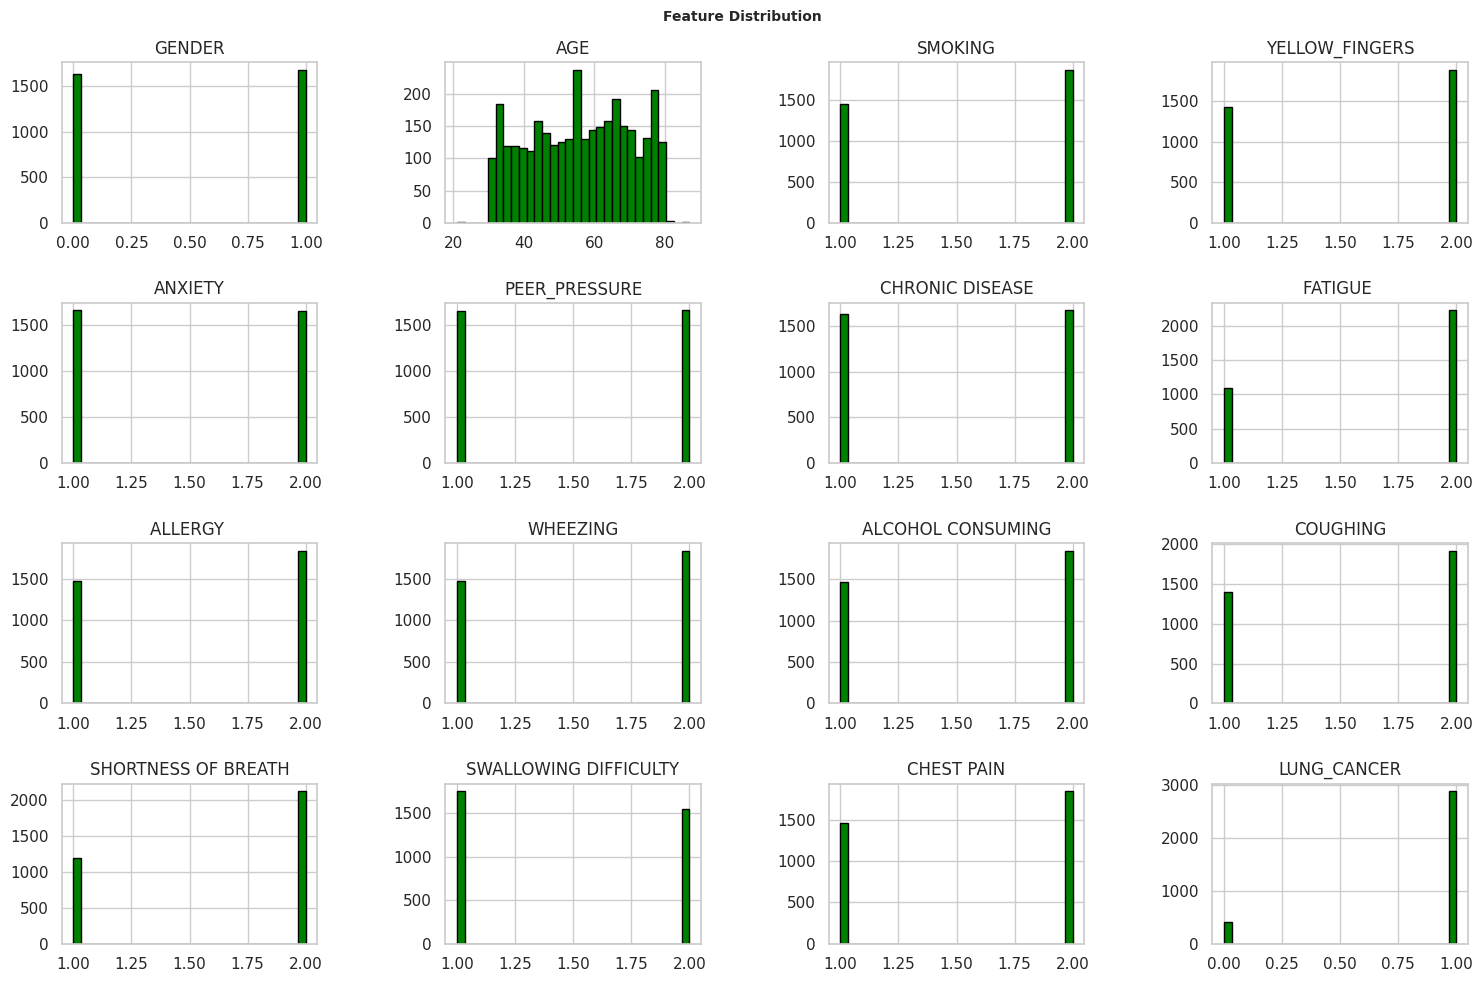

In [232]:
# Plot histograms for numerical features
data.hist(bins=30, figsize=(15, 10), color='green', edgecolor='black')
plt.suptitle('Feature Distribution', fontsize=10, fontweight='bold')
plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.5)

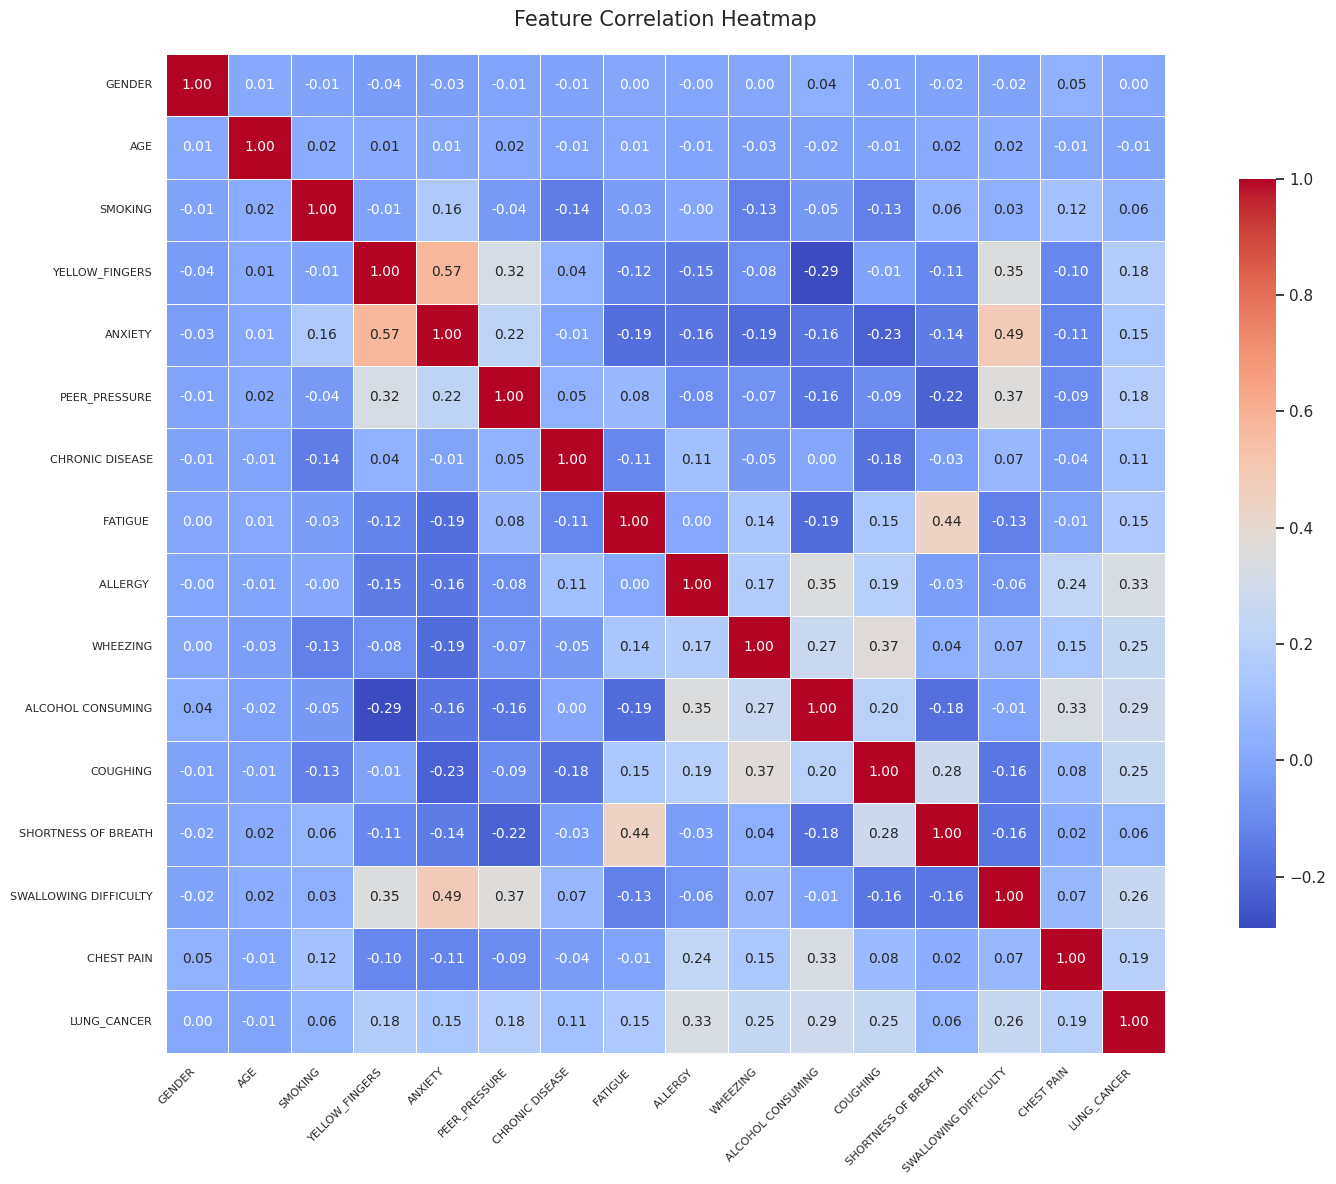

In [233]:
# Compute the correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(16, 12))

# Create a heatmap with Seaborn
heatmap = sns.heatmap(correlation_matrix,
                      annot=True,
                      fmt='.2f',
                      cmap='coolwarm',
                      linewidths=0.5,
                      square=True,
                      cbar_kws={"shrink": .75},
                      annot_kws={"size": 10},  # Annotation font size
                      mask=None)  # No mask, show all cells

# Improve label readability
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=8)

# Add a title to the heatmap
plt.title('Feature Correlation Heatmap', fontsize=15, pad=20)

# Display the plot
plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
plt.show()

#Feature Engineering

In [234]:
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Data Splitting (Hold Out Method)

In [235]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Machine Learning Models

In [236]:
# Initializing models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "Linear Regression": LinearRegression()
}

In [237]:
# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean')  # Or use 'median', 'most_frequent', etc.
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

Logistic Regression:

Accuracy: 0.9456
ROC AUC: 0.9633
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.68      0.71        66
           1       0.97      0.97      0.97       596

    accuracy                           0.95       662
   macro avg       0.86      0.83      0.84       662
weighted avg       0.94      0.95      0.94       662

Confusion Matrix:
[[ 45  21]
 [ 15 581]]



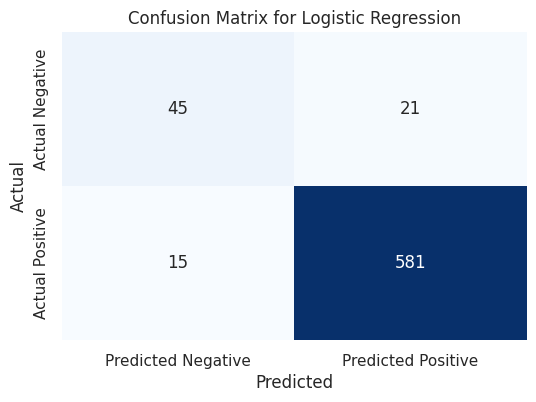

Decision Tree:

Accuracy: 0.9502
ROC AUC: 0.8782
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        66
           1       0.98      0.97      0.97       596

    accuracy                           0.95       662
   macro avg       0.85      0.88      0.87       662
weighted avg       0.95      0.95      0.95       662

Confusion Matrix:
[[ 52  14]
 [ 19 577]]



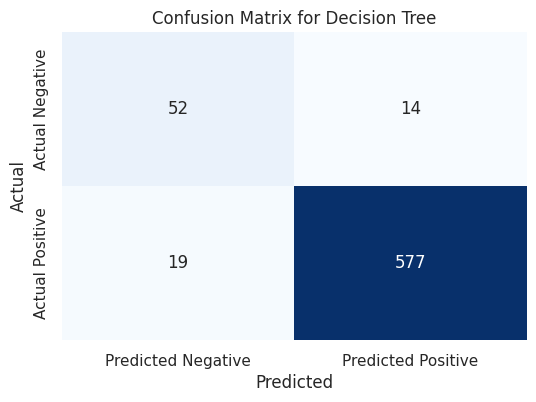

Random Forest:

Accuracy: 0.9486
ROC AUC: 0.9834
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        66
           1       0.97      0.97      0.97       596

    accuracy                           0.95       662
   macro avg       0.85      0.86      0.86       662
weighted avg       0.95      0.95      0.95       662

Confusion Matrix:
[[ 50  16]
 [ 18 578]]



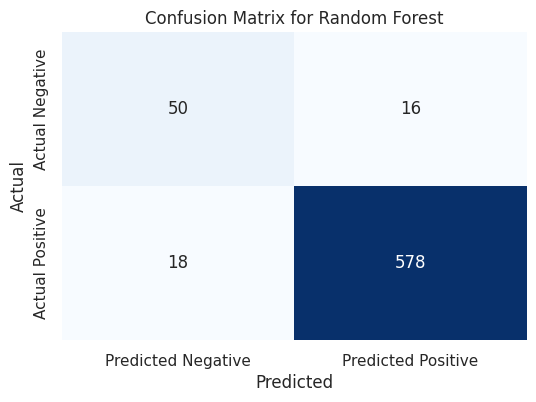

Gradient Boosting:

Accuracy: 0.9637
ROC AUC: 0.9900
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        66
           1       0.97      0.99      0.98       596

    accuracy                           0.96       662
   macro avg       0.92      0.87      0.89       662
weighted avg       0.96      0.96      0.96       662

Confusion Matrix:
[[ 50  16]
 [  8 588]]



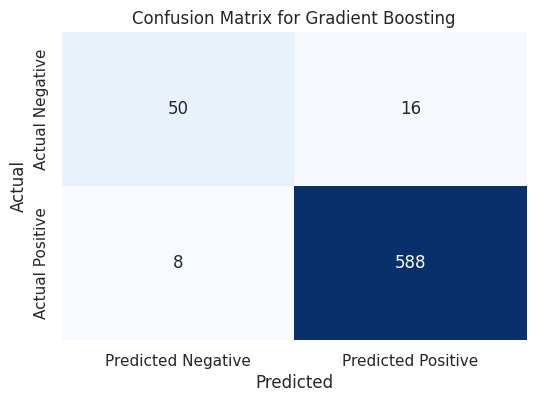

XGBoost:

Accuracy: 0.9607
ROC AUC: 0.9863
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        66
           1       0.98      0.98      0.98       596

    accuracy                           0.96       662
   macro avg       0.89      0.89      0.89       662
weighted avg       0.96      0.96      0.96       662

Confusion Matrix:
[[ 53  13]
 [ 13 583]]



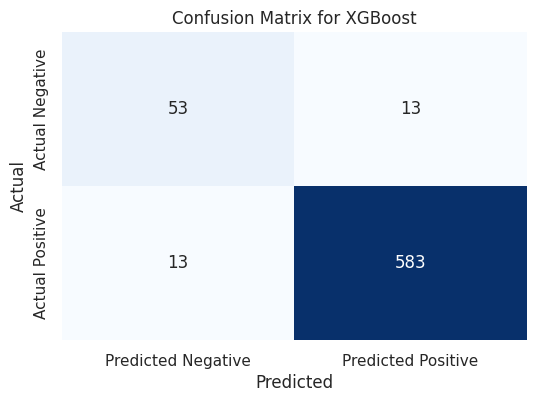

SVM:

Accuracy: 0.9698
ROC AUC: 0.9858
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.74      0.83        66
           1       0.97      0.99      0.98       596

    accuracy                           0.97       662
   macro avg       0.96      0.87      0.91       662
weighted avg       0.97      0.97      0.97       662

Confusion Matrix:
[[ 49  17]
 [  3 593]]



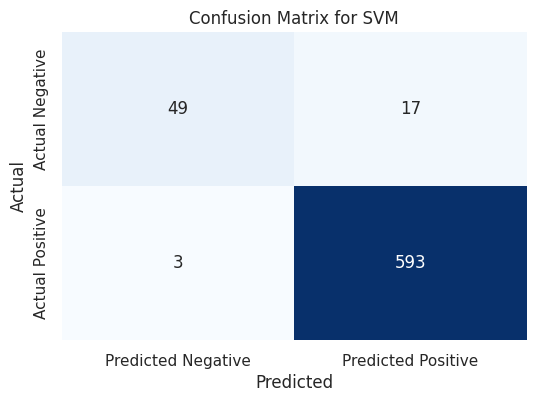

Naive Bayes:

Accuracy: 0.9169
ROC AUC: 0.9435
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.61      0.59        66
           1       0.96      0.95      0.95       596

    accuracy                           0.92       662
   macro avg       0.77      0.78      0.77       662
weighted avg       0.92      0.92      0.92       662

Confusion Matrix:
[[ 40  26]
 [ 29 567]]



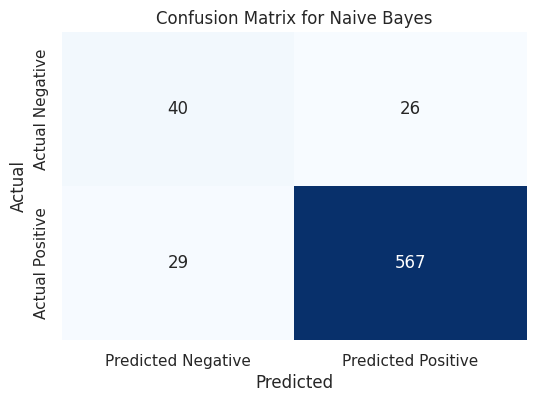

Linear Regression:

Accuracy: 0.9366
ROC AUC: 0.9617
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.53      0.62        66
           1       0.95      0.98      0.97       596

    accuracy                           0.94       662
   macro avg       0.86      0.76      0.80       662
weighted avg       0.93      0.94      0.93       662

Confusion Matrix:
[[ 35  31]
 [ 11 585]]



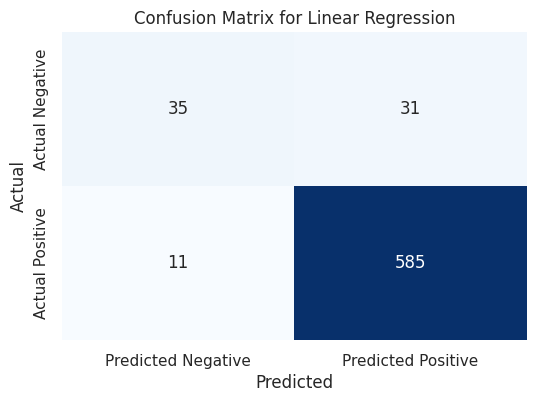

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

# Training and evaluating models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Predict and get probabilities
    if model_name == "Linear Regression":
        y_pred = (model.predict(X_test) > 0.5).astype(int)
        y_pred_proba = model.predict(X_test)
    else:
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Save results
    results[model_name] = {
        "accuracy": accuracy,
        "classification_report": classification_rep,
        "confusion_matrix": conf_matrix,
        "roc_auc": roc_auc
    }

    # Print model results
    print(f"{model_name}:\n")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Classification Report:\n{classification_rep}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


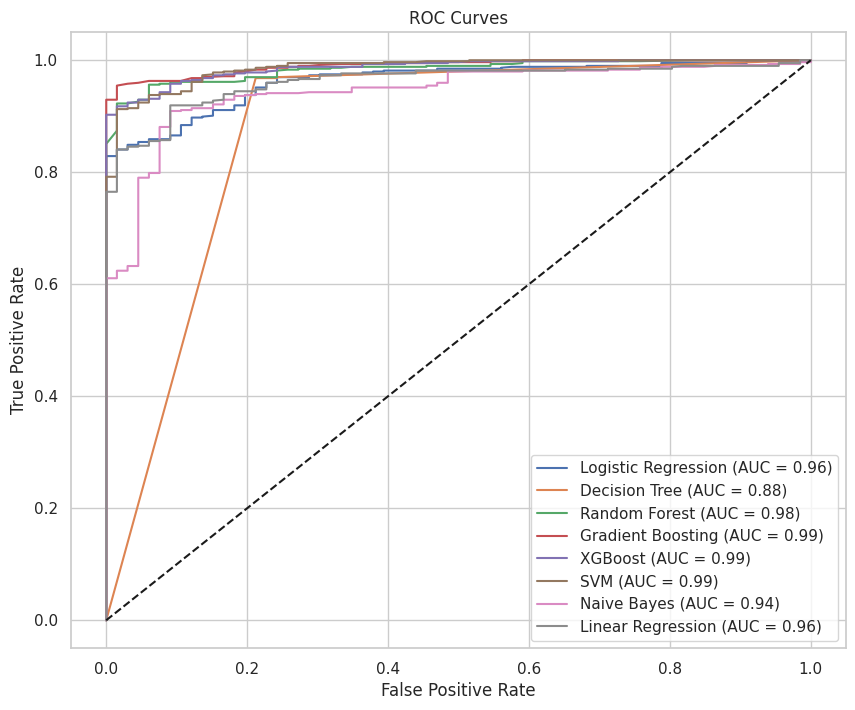

In [239]:
# Plotting ROC curves
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    if model_name == "Linear Regression":
        fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
    else:
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {results[model_name]['roc_auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='best')
plt.show()

In [240]:
# Converting target to categorical
y_train_dl = to_categorical(y_train)
y_test_dl = to_categorical(y_test)

#Deep Learning Models (ANN)

In [241]:
# Building the neural network
dl_model = Sequential()
dl_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
dl_model.add(Dropout(0.5))
dl_model.add(Dense(64, activation='relu'))
dl_model.add(Dropout(0.5))
dl_model.add(Dense(32, activation='relu'))
dl_model.add(Dense(2, activation='softmax'))

# Compiling the model
dl_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
history = dl_model.fit(X_train, y_train_dl, epochs=50, batch_size=32, validation_data=(X_test, y_test_dl), verbose=2)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 - 2s - 24ms/step - accuracy: 0.8353 - loss: 0.3599 - val_accuracy: 0.9124 - val_loss: 0.1659
Epoch 2/50
83/83 - 0s - 4ms/step - accuracy: 0.9074 - loss: 0.2141 - val_accuracy: 0.9532 - val_loss: 0.1217
Epoch 3/50
83/83 - 0s - 4ms/step - accuracy: 0.9237 - loss: 0.1741 - val_accuracy: 0.9577 - val_loss: 0.1069
Epoch 4/50
83/83 - 0s - 4ms/step - accuracy: 0.9260 - loss: 0.1674 - val_accuracy: 0.9607 - val_loss: 0.1001
Epoch 5/50
83/83 - 1s - 7ms/step - accuracy: 0.9331 - loss: 0.1515 - val_accuracy: 0.9637 - val_loss: 0.0996
Epoch 6/50
83/83 - 0s - 4ms/step - accuracy: 0.9373 - loss: 0.1353 - val_accuracy: 0.9607 - val_loss: 0.0919
Epoch 7/50
83/83 - 1s - 7ms/step - accuracy: 0.9396 - loss: 0.1377 - val_accuracy: 0.9592 - val_loss: 0.0913
Epoch 8/50
83/83 - 1s - 7ms/step - accuracy: 0.9467 - loss: 0.1238 - val_accuracy: 0.9622 - val_loss: 0.0892
Epoch 9/50
83/83 - 0s - 3ms/step - accuracy: 0.9456 - loss: 0.1256 - val_accuracy: 0.9637 - val_loss: 0.0874
Epoch 10/50
83/83 - 0s - 4ms/

In [242]:
# Evaluating the model
score = dl_model.evaluate(X_test, y_test_dl, verbose=0)
print(f"Deep Learning Model Accuracy: {score[1]:.4f}")

Deep Learning Model Accuracy: 0.9668


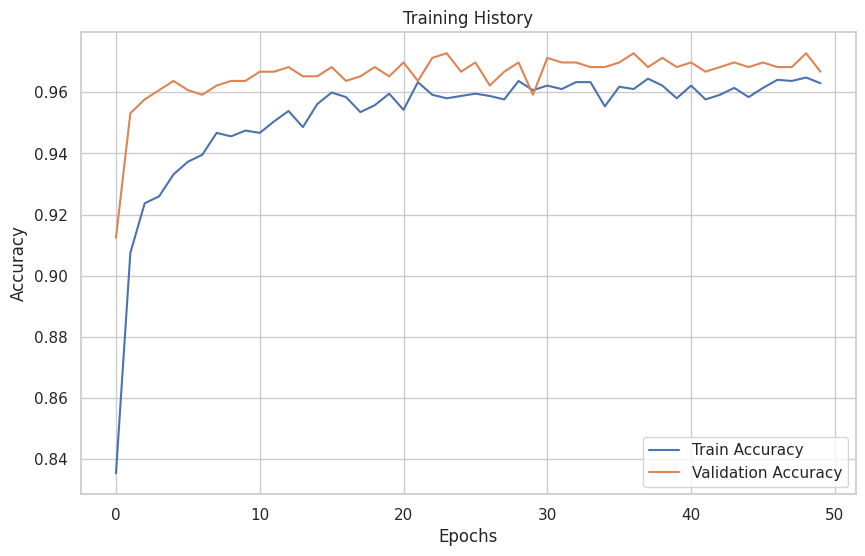

In [243]:
# Plotting training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.legend()
plt.show()

In [244]:
# Getting predictions from the neural network
y_pred_dl = np.argmax(dl_model.predict(X_test), axis=1)
conf_matrix_dl = confusion_matrix(y_test, y_pred_dl)
classification_rep_dl = classification_report(y_test, y_pred_dl)
roc_auc_dl = roc_auc_score(y_test, dl_model.predict(X_test)[:, 1])

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Deep Learning Model:

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        66
           1       0.97      0.99      0.98       596

    accuracy                           0.97       662
   macro avg       0.93      0.87      0.90       662
weighted avg       0.97      0.97      0.97       662

ROC AUC: 0.9935
Confusion Matrix:
[[ 50  16]
 [  6 590]]


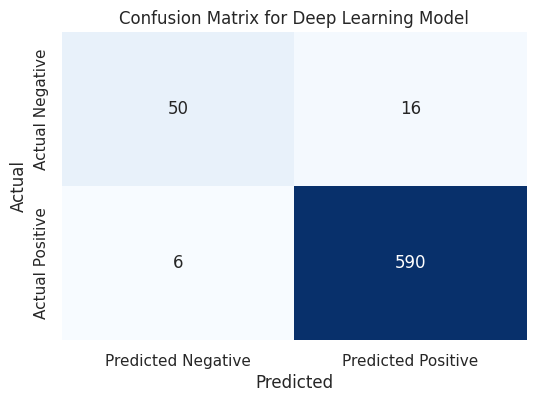

In [245]:
# Printing results for the deep learning model
print(f"Deep Learning Model:\n")
print(f"Classification Report:\n{classification_rep_dl}")
print(f"ROC AUC: {roc_auc_dl:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_dl}")

# Plot confusion matrix as a heatmap for deep learning model
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dl, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix for Deep Learning Model")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


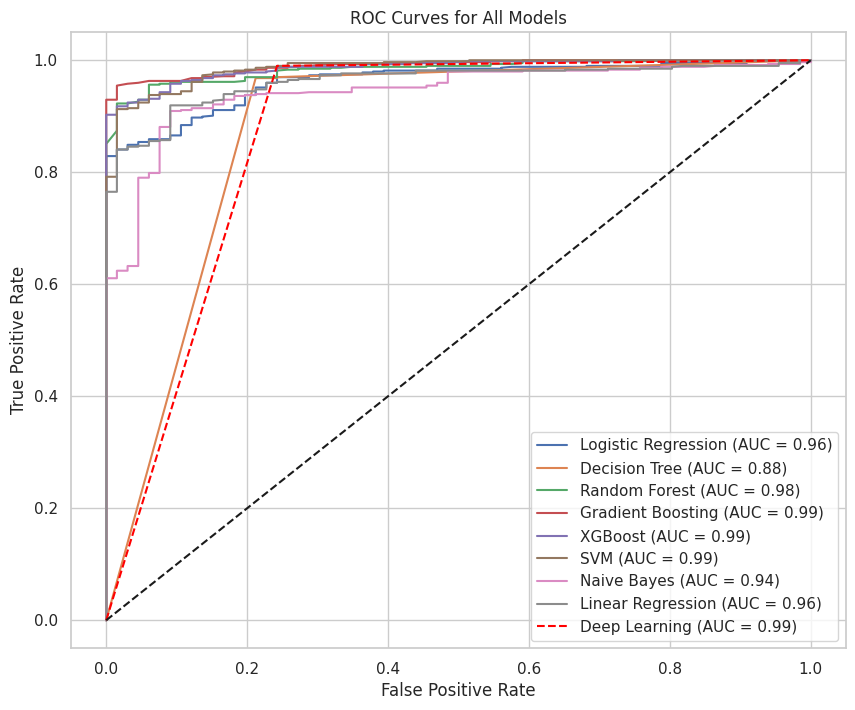

In [246]:
# Plotting ROC curves for all models including deep learning model
plt.figure(figsize=(10, 8))

# Loop through all traditional models and plot their ROC curves
for model_name, model in models.items():
    if model_name == "Linear Regression":
        fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
    else:
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {results[model_name]['roc_auc']:.2f})")

# Now plot the ROC curve for the deep learning model
fpr_dl, tpr_dl, _ = roc_curve(y_test, y_pred_dl)  # y_pred_proba_dl contains predicted probabilities for deep learning
plt.plot(fpr_dl, tpr_dl, label=f"Deep Learning (AUC = {roc_auc_dl:.2f})", color='red', linestyle='--')

# Plotting the diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='best')

# Show the plot
plt.show()


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


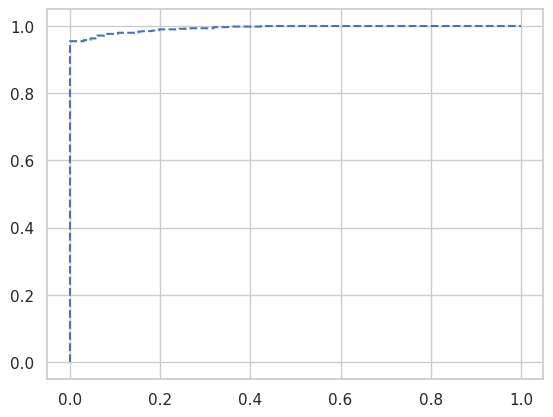

In [247]:
# ROC for Deep Learning model
fpr_dl, tpr_dl, _ = roc_curve(y_test, dl_model.predict(X_test)[:, 1])
plt.plot(fpr_dl, tpr_dl, label=f"Deep Learning (AUC = {roc_auc_dl:.2f})", linestyle='--')

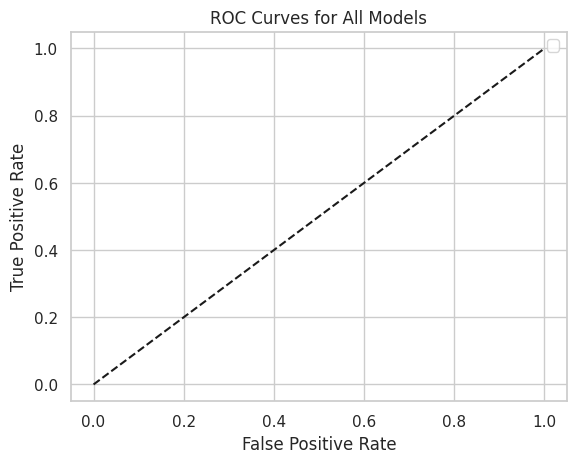

In [248]:
# Plotting diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='best')
plt.show()

#Compare All models (Visualization)

In [249]:
# Comparison of all models
model_names = list(results.keys()) + ["Deep Learning"]
accuracies = [results[model]['accuracy'] for model in results] + [score[1]]
roc_aucs = [results[model]['roc_auc'] for model in results] + [roc_auc_dl]

comparison_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies,
    "ROC AUC": roc_aucs
})

print(comparison_df)

                 Model  Accuracy   ROC AUC
0  Logistic Regression  0.945619  0.963341
1        Decision Tree  0.950151  0.878152
2        Random Forest  0.948640  0.983387
3    Gradient Boosting  0.963746  0.989958
4              XGBoost  0.960725  0.986272
5                  SVM  0.969789  0.985815
6          Naive Bayes  0.916918  0.943538
7    Linear Regression  0.936556  0.961714
8        Deep Learning  0.966767  0.993467


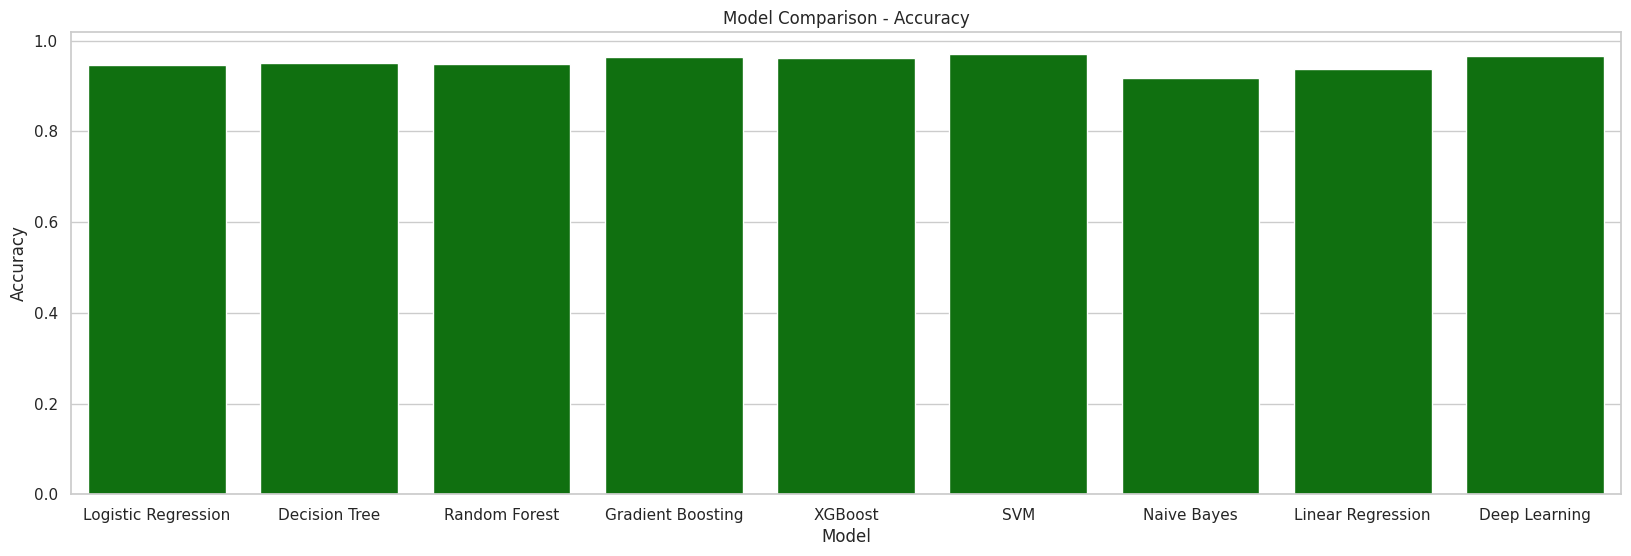

In [250]:
# Plotting model comparison
plt.figure(figsize=(20, 6))
sns.barplot(x="Model", y="Accuracy", data=comparison_df,color='green')
plt.title('Model Comparison - Accuracy')
plt.show()

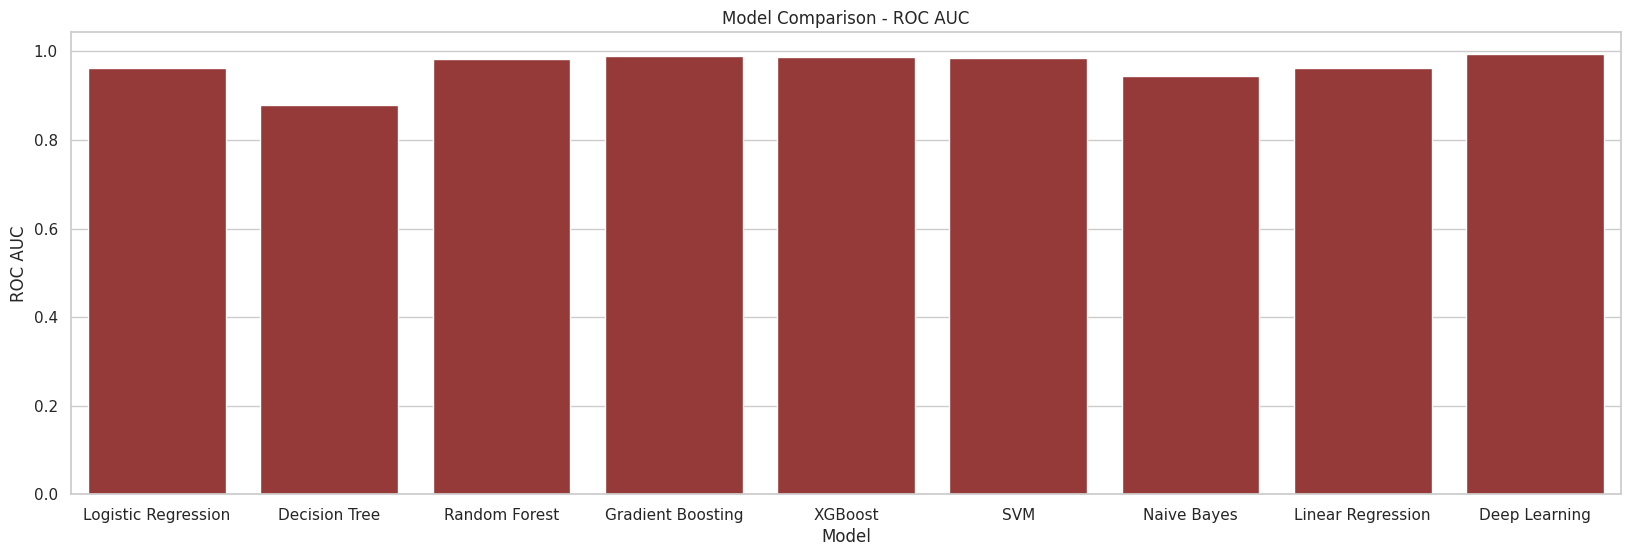

In [251]:
plt.figure(figsize=(20, 6))
sns.barplot(x="Model", y="ROC AUC", data=comparison_df,color='brown')
plt.title('Model Comparison - ROC AUC')
plt.show()

In [252]:
# Function to compute Sensitivity and Specificity
def compute_sensitivity_specificity(conf_matrix):
    TN, FP, FN, TP = conf_matrix.ravel()
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    return sensitivity, specificity

# Add Sensitivity and Specificity to results for all models
for model_name in results.keys():
    conf_matrix = results[model_name]['confusion_matrix']
    sensitivity, specificity = compute_sensitivity_specificity(conf_matrix)
    results[model_name]['sensitivity'] = sensitivity
    results[model_name]['specificity'] = specificity

# Calculate Sensitivity and Specificity for the Deep Learning model
sensitivity_dl, specificity_dl = compute_sensitivity_specificity(conf_matrix_dl)

In [253]:
# Update the comparison DataFrame with sensitivity and specificity
model_names = list(results.keys()) + ["Deep Learning"]
accuracies = [results[model]['accuracy'] for model in results] + [score[1]]
sensitivities = [results[model]['sensitivity'] for model in results] + [sensitivity_dl]
specificities = [results[model]['specificity'] for model in results] + [specificity_dl]

In [254]:
comparison_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies,
    "Sensitivity": sensitivities,
    "Specificity": specificities
})

print(comparison_df)

                 Model  Accuracy  Sensitivity  Specificity
0  Logistic Regression  0.945619     0.974832     0.681818
1        Decision Tree  0.950151     0.968121     0.787879
2        Random Forest  0.948640     0.969799     0.757576
3    Gradient Boosting  0.963746     0.986577     0.757576
4              XGBoost  0.960725     0.978188     0.803030
5                  SVM  0.969789     0.994966     0.742424
6          Naive Bayes  0.916918     0.951342     0.606061
7    Linear Regression  0.936556     0.981544     0.530303
8        Deep Learning  0.966767     0.989933     0.757576


In [255]:
# Reshape the Data for plotting
metrics_df = pd.melt(comparison_df, id_vars=["Model"],
                     value_vars=["Accuracy", "Sensitivity", "Specificity"],
                     var_name="Metric", value_name="Score")

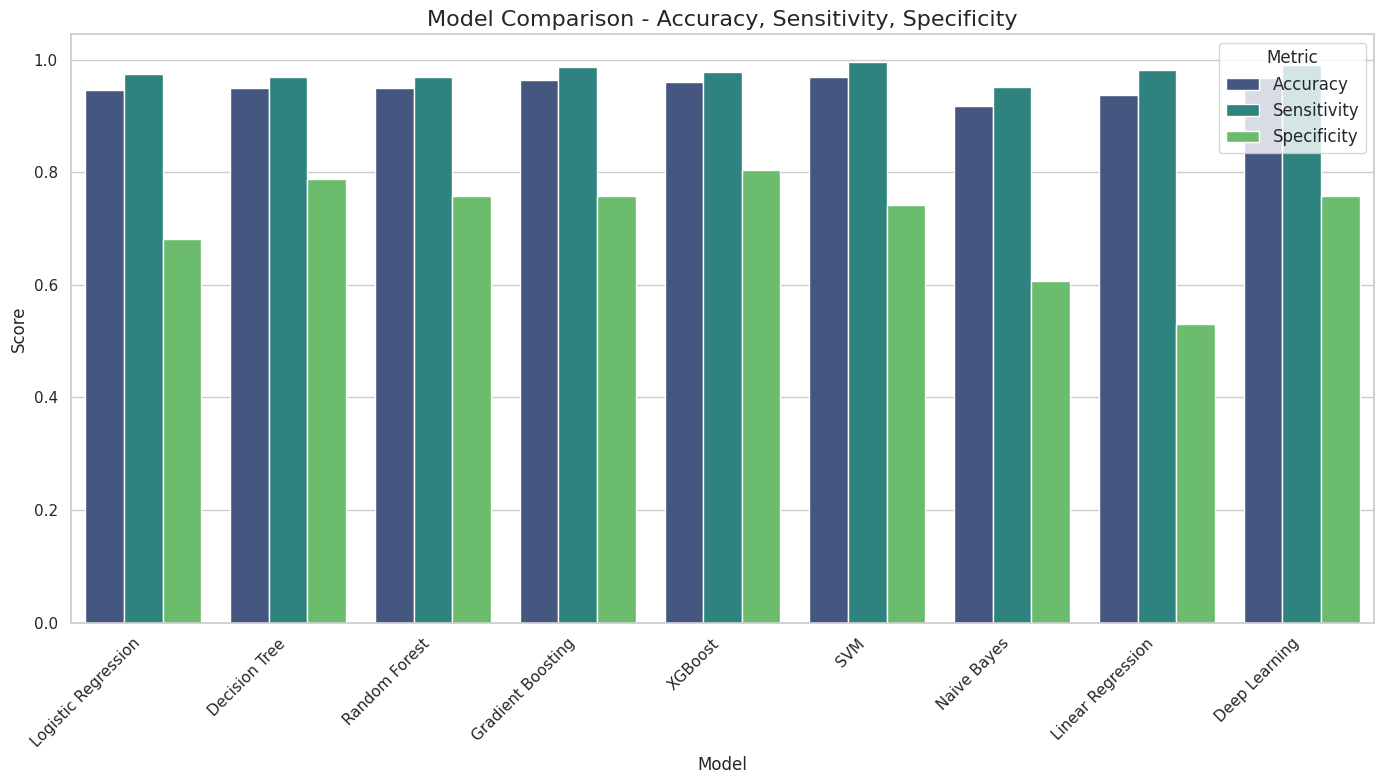

In [256]:
# Plot the Data
plt.figure(figsize=(14, 8))
sns.barplot(x="Model", y="Score", hue="Metric", data=metrics_df, palette="viridis")

# Adding titles and labels
plt.title('Model Comparison - Accuracy, Sensitivity, Specificity', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Metric", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

In [257]:
# Finding the best model based on ROC AUC
best_model_name = comparison_df['Model'][comparison_df['Accuracy'].idxmax()] # Get the model name corresponding to the maximum ROC AUC
best_model = models[best_model_name] if best_model_name != "Deep Learning" else dl_model

print(f"The best model is: {best_model_name} with Accuracy: {comparison_df.loc[comparison_df['Model'] == best_model_name, 'Accuracy'].values[0]:.4f}")

The best model is: SVM with Accuracy: 0.9698


In [258]:
# Sample new patient data
new_patient_data = [1, 32, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2]
new_patient_df = pd.DataFrame([new_patient_data], columns=X.columns)

# Scale the features
new_patient_scaled = scaler.transform(new_patient_df)

# Predict using the best model
if best_model_name != "Deep Learning":
    prediction = best_model.predict(new_patient_scaled)
else:
    prediction = np.argmax(dl_model.predict(new_patient_scaled), axis=1)

# Output the prediction
Cancer = "Cancer Patient" if prediction == 1 else "Not Cancer Patient"
print(f"The predicted status for the new patient is: {Cancer}")

The predicted status for the new patient is: Not Cancer Patient


In [259]:
# Sample new patient data
new_patient_data = [2, 32, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2]
new_patient_df = pd.DataFrame([new_patient_data], columns=X.columns)

# Scale the features
new_patient_scaled = scaler.transform(new_patient_df)

# Predict using the best model
if best_model_name != "Deep Learning":
    prediction = best_model.predict(new_patient_scaled)
else:
    prediction = np.argmax(dl_model.predict(new_patient_scaled), axis=1)

# Output the prediction
Cancer = "Cancer Patient" if prediction == 1 else "Not Cancer Patient"
print(f"The predicted status for the new patient is: {Cancer}")

The predicted status for the new patient is: Cancer Patient


In [260]:
import pickle
with open('numerical_best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
